<a href="https://colab.research.google.com/github/AlenaResiko/hw1/blob/main/Estimate_curvature_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set up

In [1]:
import curvature
import manifold
import numpy as np
import matplotlib.pyplot as plt
import math
import networkx as nx

# Any manifold function

In [2]:
def sample_any_manifold(manifold_type, n_points, R, file_name, r=0):
  # Euclidean, sphere, Poincare disk, hyperboloid, torus
  if manifold_type == "Euclidean":
    X_Euclidean = manifold.Euclidean.sample(n_points, 3, R=R)
    np.save(file_name, X_Euclidean)
    return X_Euclidean
  if manifold_type == "Sphere":
    X_Sphere = manifold.Sphere.sample(n_points, 3, R=R)
    np.save(file_name, X_Sphere)
    return X_Sphere
  if manifold_type == "PoincareDisk":
    X_PoincareDisk = manifold.PoincareDisk.sample(n_points, Rh = R)
    np.save(file_name, X_PoincareDisk)
    return X_PoincareDisk
  if manifold_type == "Hyperboloid":
    X_Hyperboloid = manifold.Hyperboloid.sample(n_points)
    np.save(file_name, X_Hyperboloid)
    return X_Hyperboloid
  if manifold_type == "Torus":
    X_Torus = manifold.Torus.sample(n_points, r=r, R=R)[0]
    np.save(file_name, X_Torus)
    return X_Torus


In [3]:
def display_any_manifold(manifold_type, X):
  %matplotlib inline
  fig = plt.figure()
  if manifold_type == "Euclidean":
    ax = plt.axes(projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], s = 3)
  if manifold_type == "Sphere":
    ax = plt.axes(projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], s = 3)
  if manifold_type == "PoincareDisk":
    ax = plt.axes(projection='3d')
    ax.scatter(X[:, 0], X[:, 1], s = 3)
  if manifold_type == "Hyperboloid":
    ax = plt.axes(projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], s = 3)
  if manifold_type == "Torus":
    ax = plt.axes(projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], s = 3)
  plt.show()

In [4]:
# this genrates RGG where edges are not weighted
# def RGG_any_manifold(manifold_type, D, min_distance, X, n_points):
#   G = nx.Graph()
#   e = []
#   position_list = []
#   for i in range(X.shape[0]):
#     position_list.append((i, {"point_position": X[i]}))
#   G.add_nodes_from(position_list)
#   for i in range(n_points):
#     for j in range(i, n_points):
#       if D[i][j] <= epsilon and i<j:
#         e.append([i, j])
#   G.add_edges_from(e)
#   return G

In [5]:
def RGG_any_manifold(manifold_type, D, min_distance, X, n_points):
  G = nx.Graph()
  e = []
  e_weights = []
  e_weighted = []
  position_list = []
  for i in range(X.shape[0]):
    position_list.append((i, {"point_position": X[i]}))
  G.add_nodes_from(position_list)
  for i in range(n_points):
    for j in range(i, n_points):
      if D[i][j] <= epsilon and i<j:
        #e.append([i, j])
        #e_weights.append(D[i,j])
        e_weighted.append((i, j, D[i][j]))
  G.add_weighted_edges_from(e_weighted)
  return G

In [6]:
e = ([1,2], [2,3], [4,8])
e_weights = (0.2, 1.3, 5.0)
e_weighted = e+e_weights
print(e_weighted)

([1, 2], [2, 3], [4, 8], 0.2, 1.3, 5.0)


In [7]:
def calculate_D_any_manifold(manifold_type, X):
  if manifold_type == "Euclidean":
    D = manifold.Euclidean.distance_array(X)
  if manifold_type == "Sphere":
    D = manifold.Sphere.Rdist_array(3, X)
  if manifold_type == "PoincareDisk":
    D = manifold.PoincareDisk.Rdist_array(X)
  if manifold_type == "Hyperboloid":
    print("distance cannot be calculated ;(")
    D = None
  if manifold_type == "Torus":
    print("distance cannot be calculated ;(")
    D = None
  return D

In [8]:
# def _format_axes(ax):
#     """Visualization options for the 3D axes."""
#     # Turn gridlines off
#     ax.grid(False)
#     # Suppress tick labels
#     for dim in (ax.xaxis, ax.yaxis, ax.zaxis):
#         dim.set_ticks([])
#     # Set axes labels
#     ax.set_xlabel("x")
#     ax.set_ylabel("y")
#     ax.set_zlabel("z")

In [9]:
# def display_graph_any_manifold(manifold_type, G):
#   # nx.draw_networkx_edges(G, pos=nx.get_node_attributes(G, "point_position"))

#   pos = nx.get_node_attributes(G, "point_position")
#   node_xyz = G.nodes()
#   edge_xyz = G.edges()

#   # Create the 3D figure
#   fig = plt.figure()
#   ax = fig.add_subplot(111, projection="3d")

#   # Plot the nodes - alpha is scaled by "depth" automatically
#   ax.scatter(pos, s=100, ec="w")

#   # Plot the edges
#   for vizedge in edge_xyz:
#       ax.plot(*vizedge.T, color="tab:gray")

#   _format_axes(ax)
#   fig.tight_layout()
#   plt.show()

# Example

In [10]:
# hyperparameters
R = 1
r = 0.1
epsilon = 0.1
n_points = 1000

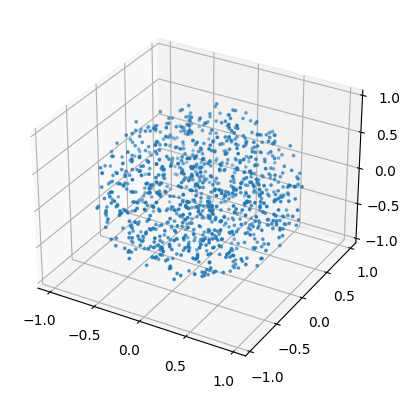

In [11]:
# Sample graph for Euclidean
%matplotlib notebook
X_E = sample_any_manifold(manifold_type="Euclidean", n_points=n_points, R=R, file_name="E.npy")
display_any_manifold(manifold_type = "Euclidean", X = X_E)
D_Euclidean = calculate_D_any_manifold(manifold_type="Euclidean", X=X_E)
G_E = RGG_any_manifold("Euclidean", D_Euclidean, epsilon, X=X_E, n_points=n_points)

In [12]:
G_E.edges()

EdgeView([(0, 590), (0, 626), (0, 809), (1, 501), (3, 330), (5, 260), (6, 597), (6, 736), (6, 958), (7, 731), (8, 209), (9, 606), (10, 996), (11, 197), (12, 765), (13, 536), (13, 716), (13, 908), (14, 679), (15, 759), (16, 316), (17, 439), (17, 925), (18, 64), (18, 388), (18, 442), (18, 523), (22, 557), (22, 778), (23, 266), (24, 999), (25, 226), (25, 468), (26, 281), (26, 854), (27, 282), (27, 315), (27, 322), (27, 549), (27, 584), (28, 728), (28, 952), (29, 646), (30, 849), (31, 513), (32, 405), (32, 698), (32, 957), (33, 481), (33, 888), (34, 254), (36, 537), (38, 806), (39, 766), (39, 838), (40, 943), (41, 681), (41, 900), (44, 286), (44, 892), (45, 321), (45, 434), (46, 267), (48, 143), (49, 355), (49, 433), (50, 922), (51, 685), (53, 60), (53, 930), (54, 582), (54, 733), (55, 379), (55, 691), (55, 956), (56, 849), (57, 519), (62, 782), (63, 628), (64, 523), (64, 610), (69, 447), (70, 261), (73, 418), (75, 593), (76, 314), (76, 404), (80, 140), (82, 694), (83, 677), (84, 241), (85

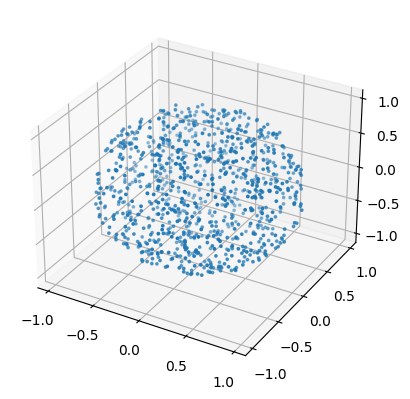

In [13]:
# Sample graph for Sphere
%matplotlib notebook
X_S = sample_any_manifold(manifold_type="Sphere", n_points=n_points, R=R, file_name="S.npy")
display_any_manifold(manifold_type = "Sphere", X = X_S)
D_Sphere = calculate_D_any_manifold(manifold_type="Sphere", X=X_S)
G_S = RGG_any_manifold("Sphere", D_Sphere, epsilon, X=X_S, n_points=n_points)

In [14]:
G_S.edges(data=True)

EdgeDataView([(1, 434, {'weight': 0.09377267472174348}), (21, 383, {'weight': 0.026753945481465376}), (24, 205, {'weight': 0.07606648857652329}), (25, 476, {'weight': 0.09299329016433831}), (26, 846, {'weight': 0.08575917226490039}), (32, 938, {'weight': 0.04094872465998256}), (35, 100, {'weight': 0.06484223530200676}), (38, 507, {'weight': 0.09085603976554793}), (45, 541, {'weight': 0.039903403420705946}), (48, 411, {'weight': 0.04906400143759301}), (63, 640, {'weight': 0.09459421121086066}), (83, 571, {'weight': 0.09867456614653093}), (85, 580, {'weight': 0.09966521375277045}), (85, 756, {'weight': 0.09462478879650382}), (93, 903, {'weight': 0.06881038417394099}), (95, 769, {'weight': 0.06946233478667023}), (119, 674, {'weight': 0.0748424684845704}), (120, 663, {'weight': 0.04252342921028215}), (120, 913, {'weight': 0.08037812049726377}), (126, 488, {'weight': 0.07726746191312993}), (134, 384, {'weight': 0.062016655043762026}), (141, 609, {'weight': 0.09714276790150157}), (144, 301, 

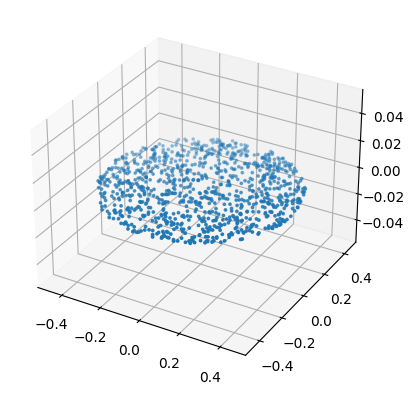

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [15]:
# Sample graph for PoincareDisk
%matplotlib notebook
X_P = sample_any_manifold(manifold_type="PoincareDisk", n_points=n_points, R=R, file_name="P.npy")
display_any_manifold(manifold_type = "PoincareDisk", X = X_P)
D_PoincareDisk = calculate_D_any_manifold(manifold_type="PoincareDisk", X=X_P)
G_P = RGG_any_manifold("PoincareDisk", D_PoincareDisk, epsilon, X=X_P, n_points=n_points)

True
a =  2
c =  1
B =  2


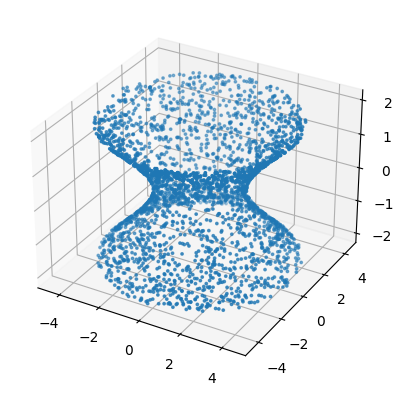

distance cannot be calculated ;(
distance were not calculated so cannot generate graph


In [16]:
# Sample graph for Hyperboloid
%matplotlib notebook
X_H = sample_any_manifold(manifold_type="Hyperboloid", n_points=n_points, R=R, file_name="H.npy")
display_any_manifold(manifold_type = "Hyperboloid", X = X_H)
D_Hyperboloid = calculate_D_any_manifold(manifold_type="Hyperboloid", X=X_H)
if D_Hyperboloid:
  G_H = RGG_any_manifold("Hyperboloid", D_Hyperboloid, epsilon, X=X_H, n_points=n_points)
else:
  print("distance were not calculated so cannot generate graph")

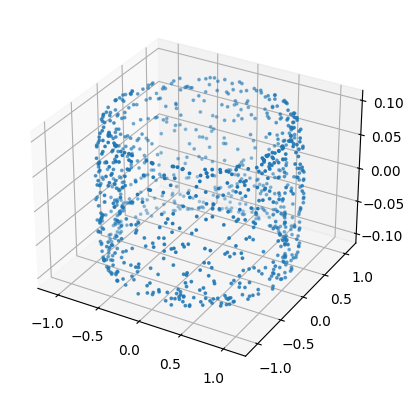

distance cannot be calculated ;(
distance were not calculated so cannot generate graph


In [17]:
# Sample graph for Torus
%matplotlib notebook
X_T = sample_any_manifold(manifold_type="Torus", n_points=n_points, r=r, R=R, file_name="T.npy")
display_any_manifold(manifold_type = "Torus", X = X_T)
D_Torus = calculate_D_any_manifold(manifold_type="Torus", X=X_T)
if D_Torus:
  G_H = RGG_any_manifold("Torus", D_Torus, epsilon, X=X_T, n_points=n_points)
else:
  print("distance were not calculated so cannot generate graph")

**Descr**

X_E = (5000x3) array of coordinates of sampled points

D_Euclidean = (n_points x n_points) array of distances

# In work - display 3d RGG with right position

In [18]:
#display_graph_any_manifold("Euclidean", G_E)

In [19]:
#G_E.nodes("point_position")

In [20]:
#G_E.nodes(data=True)

# Calculate ORC

In [22]:
!pip install GraphRicciCurvature
!pip install scikit-learn

import importlib
# matplotlib setting
%matplotlib inline

# # to print logs in jupyter notebook
# import logging
# logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.ERROR)

from GraphRicciCurvature.OllivierRicci import OllivierRicci
# load python-louvain for modularity computation
# import community as community_louvain

# for ARI computation
from sklearn import preprocessing, metrics

import GraphRicciCurvature
print(GraphRicciCurvature.__version__)

0.5.3.1


/usr/local/lib/python3.10/dist-packages/ot/backend.py:2998: UserWarning: To use TensorflowBackend, you need to activate the tensorflow numpy API. You can activate it by running: 
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()
  register_backend(TensorflowBackend())


In [23]:
#def show_results(G_orc):
def calculate_ORC_any_manifold(G_for_orc):
  orc = OllivierRicci(G_for_orc, alpha=0.5, verbose="TRACE")
  orc.compute_ricci_curvature()
  G_orc = orc.G.copy()
  #show_results
  # Print the first thirty results
  print("G_E, first 30 edges: ")
  for n1,n2 in list(G_orc.edges())[:30]:
      print("Ollivier-Ricci curvature of edge (%s,%s) is %f" % (n1 ,n2, G_orc[n1][n2]["ricciCurvature"]))

  # Plot the histogram of Ricci curvatures
  plt.subplot(2, 1, 1)
  ricci_curvtures = nx.get_edge_attributes(G_orc, "ricciCurvature").values()
  plt.hist(ricci_curvtures,bins=20)
  plt.xlabel('Ricci curvature')
  plt.title("Histogram of Ricci Curvatures")

  # Plot the histogram of edge weights
  plt.subplot(2, 1, 2)
  weights = nx.get_edge_attributes(G_orc, "weight").values()
  plt.hist(weights,bins=20)
  plt.xlabel('Edge weight')
  plt.title("Histogram of Edge weights")

  plt.tight_layout()

TRACE:GraphRicciCurvature:Number of nodes: 1000
TRACE:GraphRicciCurvature:Number of edges: 492
TRACE:GraphRicciCurvature:Start to compute all pair shortest path.
TRACE:GraphRicciCurvature:0.108756 secs for all pair by NetworKit.
INFO:GraphRicciCurvature:0.648820 secs for Ricci curvature computation.


G_E, first 30 edges: 
Ollivier-Ricci curvature of edge (0,590) is 0.526627
Ollivier-Ricci curvature of edge (0,626) is 0.665317
Ollivier-Ricci curvature of edge (0,809) is 0.329957
Ollivier-Ricci curvature of edge (1,501) is 0.495857
Ollivier-Ricci curvature of edge (3,330) is 1.000000
Ollivier-Ricci curvature of edge (5,260) is 1.000000
Ollivier-Ricci curvature of edge (6,597) is 0.489802
Ollivier-Ricci curvature of edge (6,736) is 0.482851
Ollivier-Ricci curvature of edge (6,958) is 0.666556
Ollivier-Ricci curvature of edge (7,731) is 0.580957
Ollivier-Ricci curvature of edge (8,209) is 1.000000
Ollivier-Ricci curvature of edge (9,606) is 0.529781
Ollivier-Ricci curvature of edge (10,996) is 1.000000
Ollivier-Ricci curvature of edge (11,197) is 1.000000
Ollivier-Ricci curvature of edge (12,765) is 1.000000
Ollivier-Ricci curvature of edge (13,536) is 0.233511
Ollivier-Ricci curvature of edge (13,716) is -0.077083
Ollivier-Ricci curvature of edge (13,908) is -0.124019
Ollivier-Ricci c

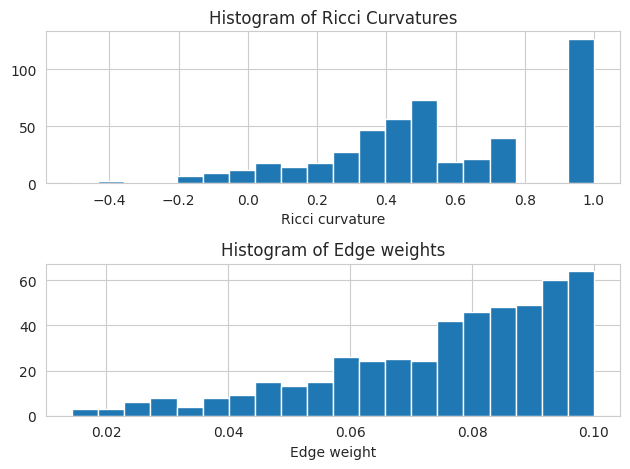

In [24]:
G_E_orc = G_E.copy()
calculate_ORC_any_manifold(G_E_orc)

In [27]:
# G_orc[0][508]["ricciCurvature"] # error because there is no edge #G_orc[1][594]
# for n1,n2 in list(G_orc.edges())[:1]:
#   print(G_orc[n1][n2])

TRACE:GraphRicciCurvature:Number of nodes: 1000
TRACE:GraphRicciCurvature:Number of edges: 106
TRACE:GraphRicciCurvature:Start to compute all pair shortest path.
TRACE:GraphRicciCurvature:0.056912 secs for all pair by NetworKit.
INFO:GraphRicciCurvature:0.288646 secs for Ricci curvature computation.


G_E, first 30 edges: 
Ollivier-Ricci curvature of edge (1,434) is 1.000000
Ollivier-Ricci curvature of edge (21,383) is 1.000000
Ollivier-Ricci curvature of edge (24,205) is 1.000000
Ollivier-Ricci curvature of edge (25,476) is 1.000000
Ollivier-Ricci curvature of edge (26,846) is 0.464351
Ollivier-Ricci curvature of edge (32,938) is 1.000000
Ollivier-Ricci curvature of edge (35,100) is 1.000000
Ollivier-Ricci curvature of edge (38,507) is 1.000000
Ollivier-Ricci curvature of edge (45,541) is 1.000000
Ollivier-Ricci curvature of edge (48,411) is 1.000000
Ollivier-Ricci curvature of edge (63,640) is 0.524362
Ollivier-Ricci curvature of edge (83,571) is 1.000000
Ollivier-Ricci curvature of edge (85,580) is 0.749752
Ollivier-Ricci curvature of edge (85,756) is 0.749854
Ollivier-Ricci curvature of edge (93,903) is 1.000000
Ollivier-Ricci curvature of edge (95,769) is 1.000000
Ollivier-Ricci curvature of edge (119,674) is 1.000000
Ollivier-Ricci curvature of edge (120,663) is 0.279129
Olliv

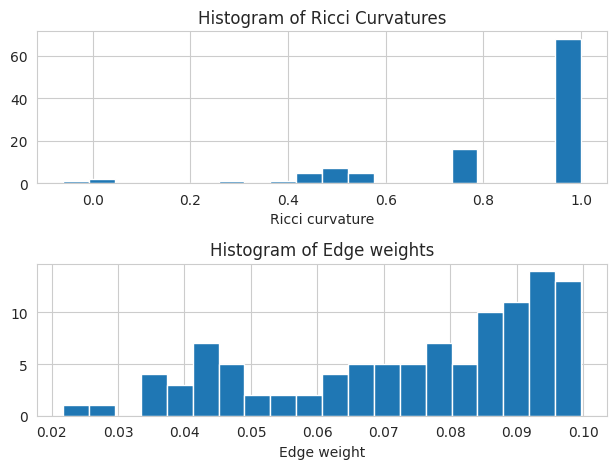

In [25]:
G_S_orc = G_S.copy()
calculate_ORC_any_manifold(G_S_orc)

TRACE:GraphRicciCurvature:Number of nodes: 1000
TRACE:GraphRicciCurvature:Number of edges: 4469
TRACE:GraphRicciCurvature:Start to compute all pair shortest path.
TRACE:GraphRicciCurvature:0.509768 secs for all pair by NetworKit.
INFO:GraphRicciCurvature:3.762194 secs for Ricci curvature computation.


G_E, first 30 edges: 
Ollivier-Ricci curvature of edge (0,38) is 0.017227
Ollivier-Ricci curvature of edge (0,520) is -0.146469
Ollivier-Ricci curvature of edge (0,572) is -0.001123
Ollivier-Ricci curvature of edge (0,612) is -0.157922
Ollivier-Ricci curvature of edge (0,701) is -0.337965
Ollivier-Ricci curvature of edge (0,797) is 0.053949
Ollivier-Ricci curvature of edge (1,147) is 0.189516
Ollivier-Ricci curvature of edge (1,258) is 0.161985
Ollivier-Ricci curvature of edge (1,270) is -0.194168
Ollivier-Ricci curvature of edge (1,396) is 0.218583
Ollivier-Ricci curvature of edge (1,475) is 0.192210
Ollivier-Ricci curvature of edge (1,560) is -0.084272
Ollivier-Ricci curvature of edge (1,567) is 0.128283
Ollivier-Ricci curvature of edge (1,636) is 0.084901
Ollivier-Ricci curvature of edge (1,676) is 0.153867
Ollivier-Ricci curvature of edge (1,943) is -0.317536
Ollivier-Ricci curvature of edge (2,151) is -0.014150
Ollivier-Ricci curvature of edge (2,189) is -0.221135
Ollivier-Ricci c

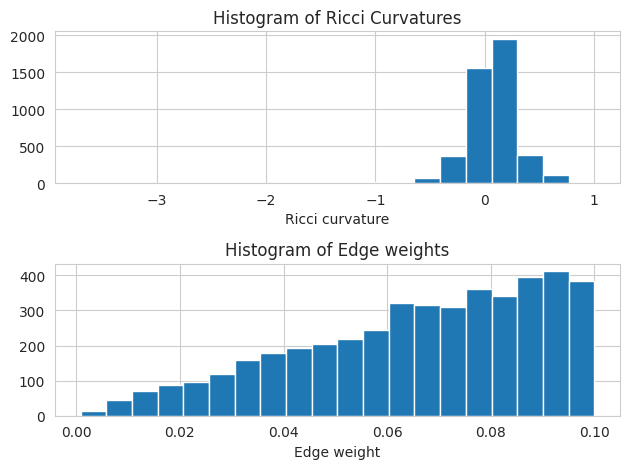

In [26]:
G_P_orc = G_P.copy()
calculate_ORC_any_manifold(G_P_orc)